### Exploring Hacker News Posts: when is the best time to ask questions? ###

Hacker News is a site where users can leave their posts whicha are later voted or commended upon by other users. Very popular in technology circles and the most popular posts are seen by hundreds of thousands of users.

Focus of this analysis is specifically in posts whose titles begin with either Ask HN or Show HN (questions to community or showing some projects, products or smth else to the community).

Dataset was taken from here: https://www.kaggle.com/hacker-news/hacker-news-posts#HN_posts_year_to_Sep_26_2016.csv

In [1]:
from csv import reader
import pandas as pd

hn = open('hacker_news.csv', encoding='utf-8')
hn = reader(hn)
hn = list(hn)
hn_header = hn[0]
hn = hn[1:]
hn_header

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']

**Dateset includes these columns:**

-**id**: The unique identifier from Hacker News for the post

-**title**: The title of the post

-**url**: The URL that the posts links to, if it the post has a URL

-**num_points**: The number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes

-**num_comments**: The number of comments that were made on the post

-**author**: The username of the person who submitted the post

-**created_at**: The date and time at which the post was submitted

#### Separate posts including questions and showing smth as the start from "ask hn" and "show hn" respectively.###

In [2]:
ask_posts=[]
show_posts=[]
other_posts=[]

for row in hn:
    title=row[1]
    title_l=title.lower()
    if title_l.startswith('ask hn')==True:
        ask_posts.append(row)
    elif title_l.startswith('show hn')==True:
        show_posts.append(row)
    else:
        other_posts.append(row)
        
print('There are {} ask posts in the dataset!'.format(len(ask_posts)))
print('There are {} show posts in the dataset!'.format(len(show_posts)))
print('There are {} other posts in the dataset!'.format(len(other_posts)))

There are 1744 ask posts in the dataset!
There are 1162 show posts in the dataset!
There are 17194 other posts in the dataset!


In [6]:
#example of ask posts
ask_posts[:1]

[['12296411',
  'Ask HN: How to improve my personal website?',
  '',
  '2',
  '6',
  'ahmedbaracat',
  '8/16/2016 9:55']]

In [7]:
#example of show posts
show_posts[:1]

[['10627194',
  'Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform',
  'https://iot.seeed.cc',
  '26',
  '22',
  'kfihihc',
  '11/25/2015 14:03']]

In [8]:
#example of other posts
other_posts[:1]

[['12224879',
  'Interactive Dynamic Video',
  'http://www.interactivedynamicvideo.com/',
  '386',
  '52',
  'ne0phyte',
  '8/4/2016 11:52']]

In [9]:
total_ask_comments=0

for row in ask_posts:
    num_comments=int(row[4])
    total_ask_comments=total_ask_comments+num_comments
    
print("Total number of comments for ask posts is {}!".format(total_ask_comments))

Total number of comments for ask posts is 24483!


In [10]:
avg_ask_comments=total_ask_comments/len(ask_posts)
print("Average number of comments for ask posts is {}!".format(avg_ask_comments))

Average number of comments for ask posts is 14.038417431192661!


In [11]:
total_show_comments=0

for row in show_posts:
    num_comments=int(row[4])
    total_show_comments=total_show_comments+num_comments
    
print("Total number of comments for show posts is {}!".format(total_show_comments))

Total number of comments for show posts is 11988!


In [12]:
avg_show_comments=total_show_comments/len(show_posts)
print("Average number of comments for show posts is {}!".format(avg_show_comments))

Average number of comments for show posts is 10.31669535283993!


As we can see from the cells above average number of comments for ask posts is 14 (rounded) and for show posts just 10 (rounded). For some reason people prefer to answer questions or response to the posts with questions included rather then just seing something.

### Futher investigation on Ask posts as they are more likely to receive comments ###

In [13]:
import datetime as dt

In [16]:
#to see what time posts receive most comments
result_list=[]

for row in ask_posts:
    created_at=row[6]
    num_comments=int(row[4])
    list1=[]
    list1.append(created_at)
    list1.append(num_comments)
    result_list.append(list1)
    
result_list[:10]

[['8/16/2016 9:55', 6],
 ['11/22/2015 13:43', 29],
 ['5/2/2016 10:14', 1],
 ['8/2/2016 14:20', 3],
 ['10/15/2015 16:38', 17],
 ['9/26/2015 23:23', 1],
 ['4/22/2016 12:24', 4],
 ['11/16/2015 9:22', 1],
 ['2/24/2016 17:57', 1],
 ['6/4/2016 17:17', 2]]

In [17]:
date_format = "%m/%d/%Y %H:%M"
for row in result_list:
    date=row[0]
    date=dt.datetime.strptime(date, date_format)
    row[0]= date
    
result_list[:10]

[[datetime.datetime(2016, 8, 16, 9, 55), 6],
 [datetime.datetime(2015, 11, 22, 13, 43), 29],
 [datetime.datetime(2016, 5, 2, 10, 14), 1],
 [datetime.datetime(2016, 8, 2, 14, 20), 3],
 [datetime.datetime(2015, 10, 15, 16, 38), 17],
 [datetime.datetime(2015, 9, 26, 23, 23), 1],
 [datetime.datetime(2016, 4, 22, 12, 24), 4],
 [datetime.datetime(2015, 11, 16, 9, 22), 1],
 [datetime.datetime(2016, 2, 24, 17, 57), 1],
 [datetime.datetime(2016, 6, 4, 17, 17), 2]]

In [18]:
#exclude just hour from datetime format
for row in result_list:
    date=row[0]    
    hour=date.strftime("%H")
    row[0]=hour
result_list

[['09', 6],
 ['13', 29],
 ['10', 1],
 ['14', 3],
 ['16', 17],
 ['23', 1],
 ['12', 4],
 ['09', 1],
 ['17', 1],
 ['17', 2],
 ['17', 7],
 ['13', 1],
 ['15', 1],
 ['21', 4],
 ['21', 4],
 ['20', 2],
 ['02', 3],
 ['12', 1],
 ['02', 22],
 ['14', 2],
 ['18', 2],
 ['13', 7],
 ['16', 7],
 ['17', 3],
 ['15', 6],
 ['14', 2],
 ['03', 1],
 ['21', 3],
 ['05', 29],
 ['03', 2],
 ['21', 20],
 ['19', 3],
 ['18', 3],
 ['01', 33],
 ['09', 5],
 ['01', 4],
 ['13', 7],
 ['17', 11],
 ['19', 1],
 ['15', 9],
 ['14', 2],
 ['20', 37],
 ['16', 1],
 ['22', 2],
 ['23', 4],
 ['19', 1],
 ['01', 1],
 ['17', 182],
 ['19', 5],
 ['16', 9],
 ['22', 8],
 ['01', 24],
 ['08', 5],
 ['04', 3],
 ['20', 4],
 ['12', 7],
 ['00', 10],
 ['14', 3],
 ['10', 3],
 ['16', 4],
 ['21', 3],
 ['17', 20],
 ['10', 1],
 ['16', 140],
 ['13', 5],
 ['13', 3],
 ['02', 30],
 ['16', 2],
 ['19', 2],
 ['14', 5],
 ['14', 1],
 ['14', 17],
 ['06', 1],
 ['17', 1],
 ['23', 5],
 ['18', 5],
 ['05', 2],
 ['17', 8],
 ['20', 2],
 ['18', 6],
 ['14', 22],
 ['02', 7]

In [19]:
#count how many posts and how many comments were made based on hour of a day
counts_by_hour={}
comments_by_hour={}

for row in result_list:
    hour=row[0]
    comments=int(row[1])
    if hour in counts_by_hour:
        counts_by_hour[hour]+=1
        comments_by_hour[hour]+=comments
    else:
        counts_by_hour[hour]=1
        comments_by_hour[hour]=comments

In [20]:
counts_by_hour

{'09': 45,
 '13': 85,
 '10': 59,
 '14': 107,
 '16': 108,
 '23': 68,
 '12': 73,
 '17': 100,
 '15': 116,
 '21': 109,
 '20': 80,
 '02': 58,
 '18': 109,
 '03': 54,
 '05': 46,
 '19': 110,
 '01': 60,
 '22': 71,
 '08': 48,
 '04': 47,
 '00': 55,
 '06': 44,
 '07': 34,
 '11': 58}

In [21]:
comments_by_hour

{'09': 251,
 '13': 1253,
 '10': 793,
 '14': 1416,
 '16': 1814,
 '23': 543,
 '12': 687,
 '17': 1146,
 '15': 4477,
 '21': 1745,
 '20': 1722,
 '02': 1381,
 '18': 1439,
 '03': 421,
 '05': 464,
 '19': 1188,
 '01': 683,
 '22': 479,
 '08': 492,
 '04': 337,
 '00': 447,
 '06': 397,
 '07': 267,
 '11': 641}

In [22]:
counts_by_hour.values()

dict_values([45, 85, 59, 107, 108, 68, 73, 100, 116, 109, 80, 58, 109, 54, 46, 110, 60, 71, 48, 47, 55, 44, 34, 58])

In [23]:
comments_by_hour.values()

dict_values([251, 1253, 793, 1416, 1814, 543, 687, 1146, 4477, 1745, 1722, 1381, 1439, 421, 464, 1188, 683, 479, 492, 337, 447, 397, 267, 641])

In [25]:
#count average number of comments given to the posts based on the hour
def divide(dividends, divisors):
    ret = dict()
    for key, dividend in dividends.items():
        ret[key] = dividend/divisors.get(key, 1)
    return ret

In [26]:
avg_by_hour=divide(comments_by_hour,counts_by_hour)
avg_by_hour

{'09': 5.5777777777777775,
 '13': 14.741176470588234,
 '10': 13.440677966101696,
 '14': 13.233644859813085,
 '16': 16.796296296296298,
 '23': 7.985294117647059,
 '12': 9.41095890410959,
 '17': 11.46,
 '15': 38.5948275862069,
 '21': 16.009174311926607,
 '20': 21.525,
 '02': 23.810344827586206,
 '18': 13.20183486238532,
 '03': 7.796296296296297,
 '05': 10.08695652173913,
 '19': 10.8,
 '01': 11.383333333333333,
 '22': 6.746478873239437,
 '08': 10.25,
 '04': 7.170212765957447,
 '00': 8.127272727272727,
 '06': 9.022727272727273,
 '07': 7.852941176470588,
 '11': 11.051724137931034}

In [28]:
#sort from highest to lowest
avg=sorted(avg_by_hour.items(), key=lambda kv: kv[1], reverse=True)
avg

[('15', 38.5948275862069),
 ('02', 23.810344827586206),
 ('20', 21.525),
 ('16', 16.796296296296298),
 ('21', 16.009174311926607),
 ('13', 14.741176470588234),
 ('10', 13.440677966101696),
 ('14', 13.233644859813085),
 ('18', 13.20183486238532),
 ('17', 11.46),
 ('01', 11.383333333333333),
 ('11', 11.051724137931034),
 ('19', 10.8),
 ('08', 10.25),
 ('05', 10.08695652173913),
 ('12', 9.41095890410959),
 ('06', 9.022727272727273),
 ('00', 8.127272727272727),
 ('23', 7.985294117647059),
 ('07', 7.852941176470588),
 ('03', 7.796296296296297),
 ('04', 7.170212765957447),
 ('22', 6.746478873239437),
 ('09', 5.5777777777777775)]

In [75]:
avg=pd.DataFrame(avg)
avg=avg.rename(index=str, columns={0: "hour", 1: "avg_num"})
avg.head()

,hour,avg_num
0,15,38.594828
1,02,23.810345
2,20,21.525000
3,16,16.796296
4,21,16.009174


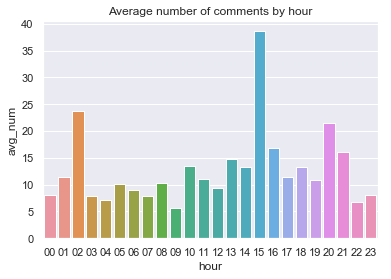

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.barplot(x="hour",y="avg_num", data=avg).set_title("Average number of comments by hour")

### Conclusion ###
So we see that posts made at 15.00 have maximum average number of comments - 38.59! Best time to ask questions!